# Multiple Lenear Regression

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 300
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('50_Startups.csv')
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [5]:
df.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

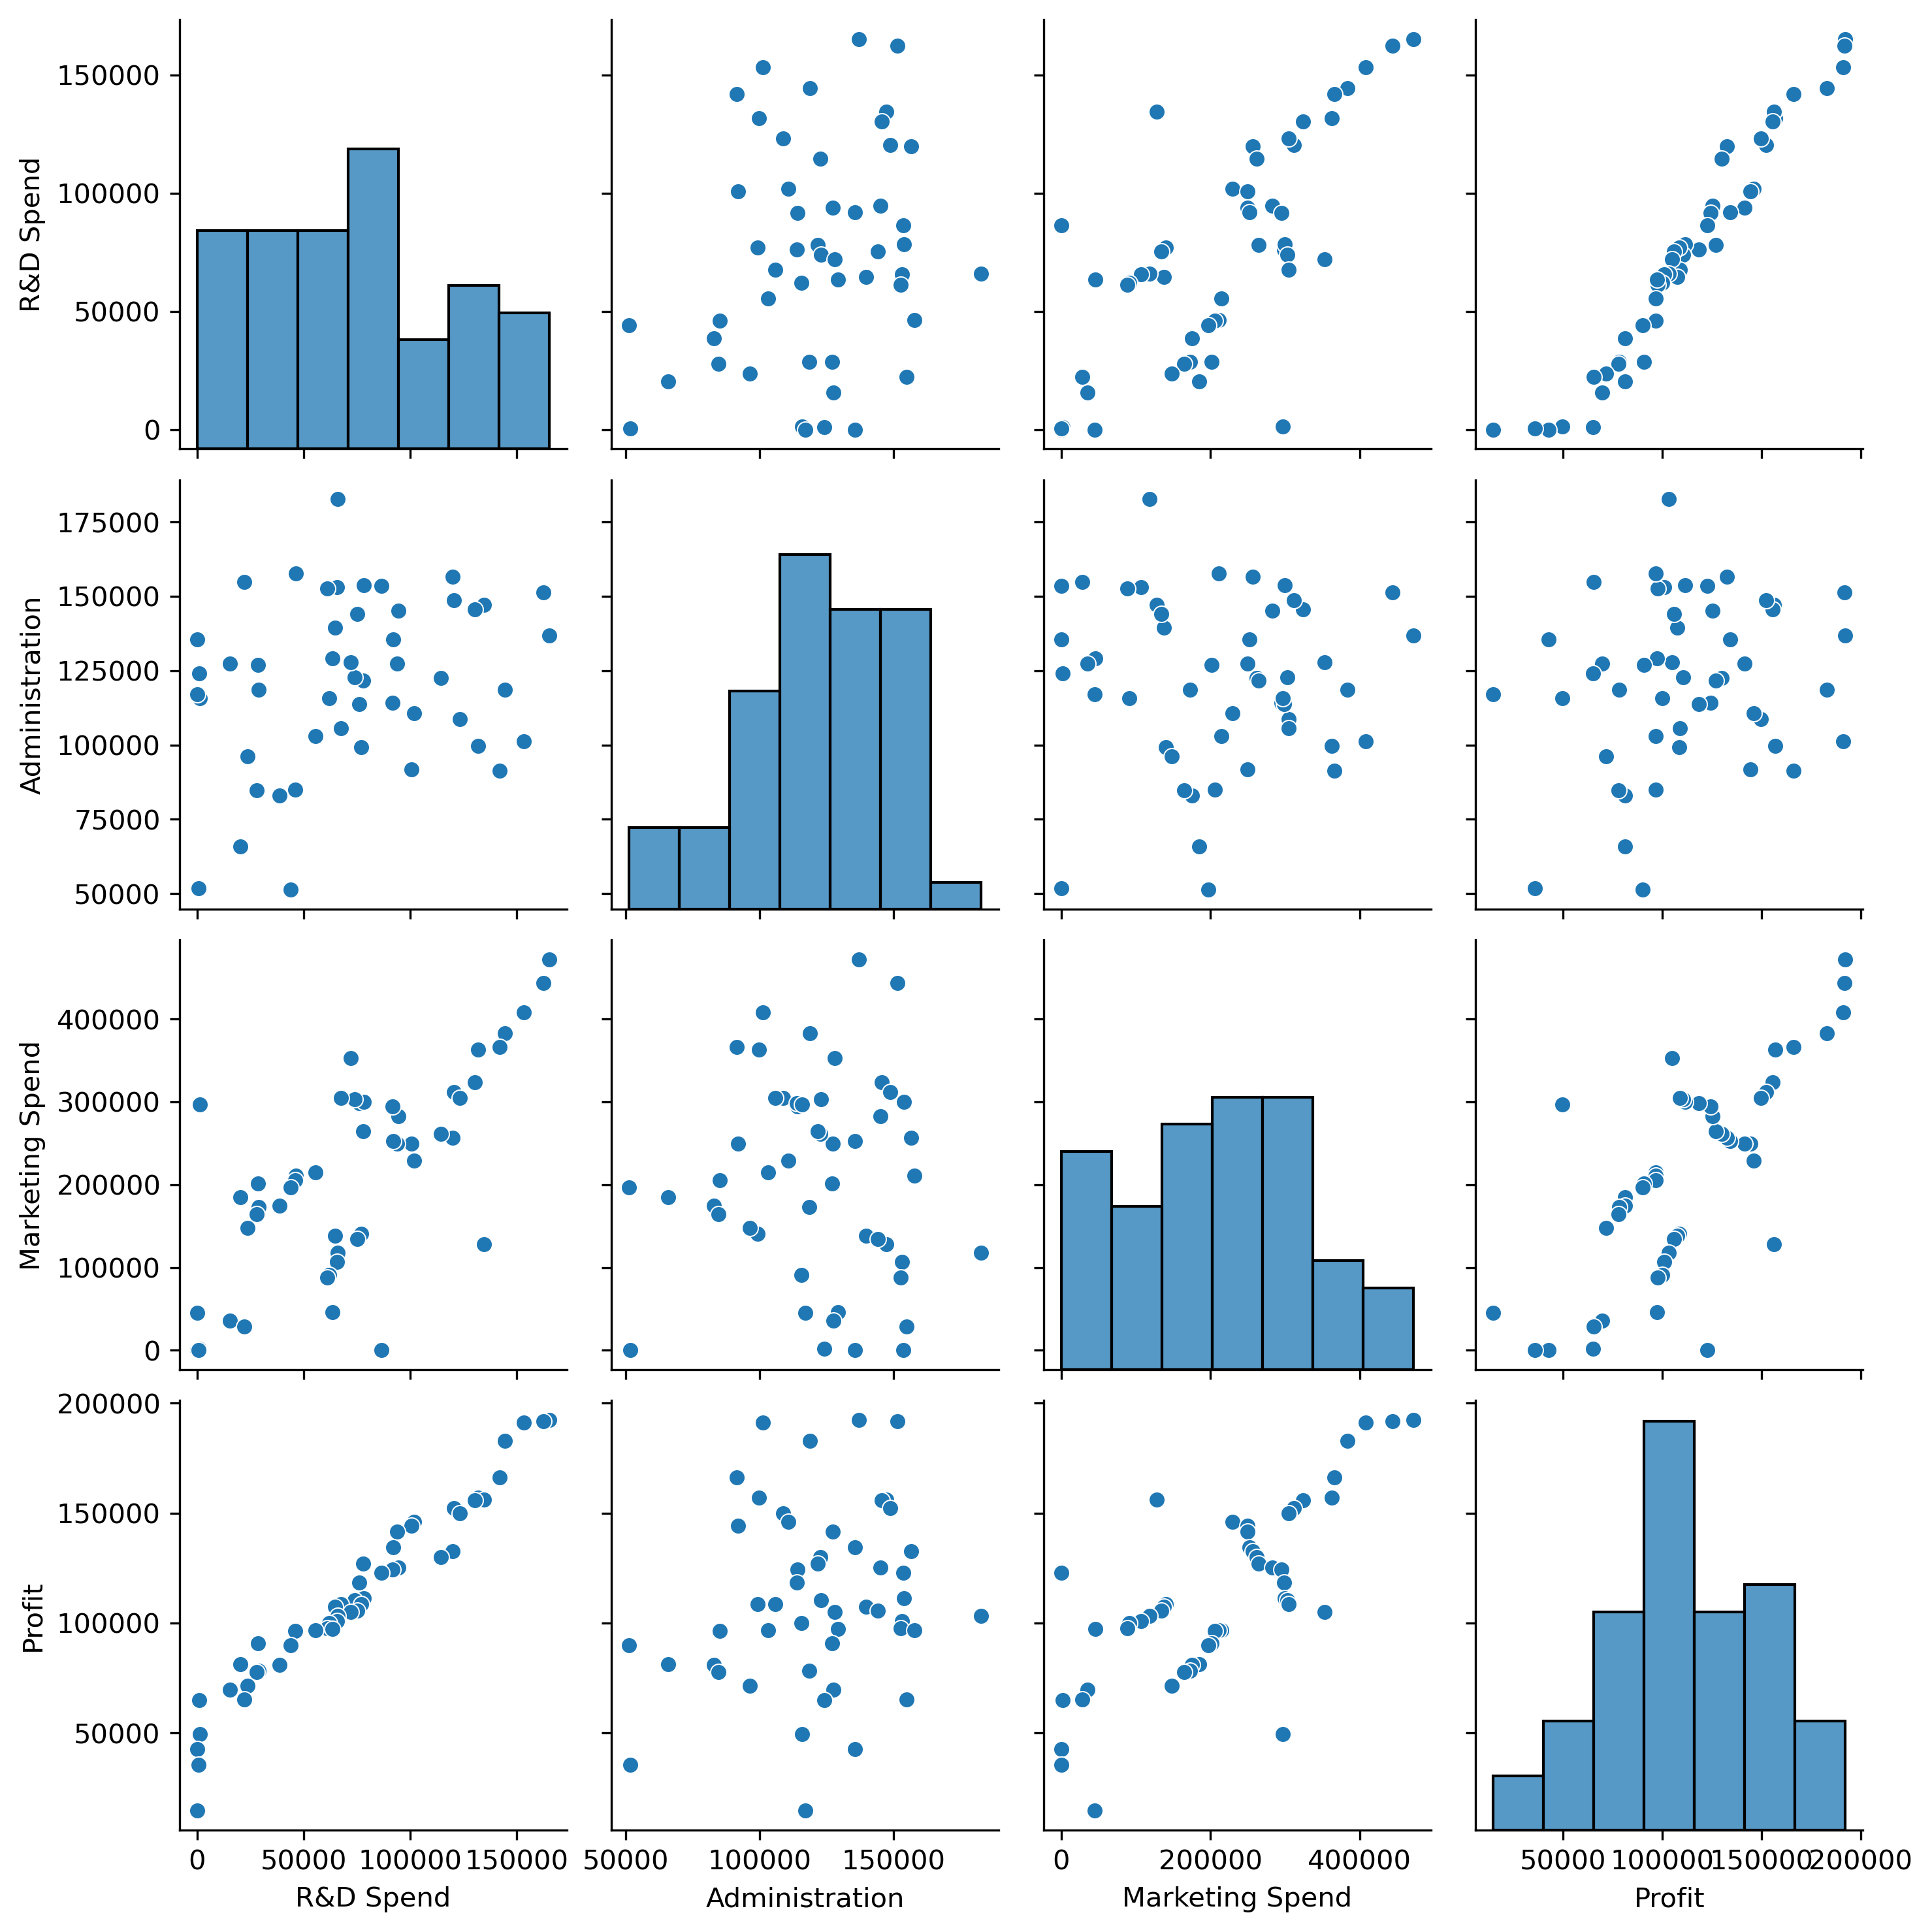

In [6]:
sns.pairplot(df)

<Axes: >

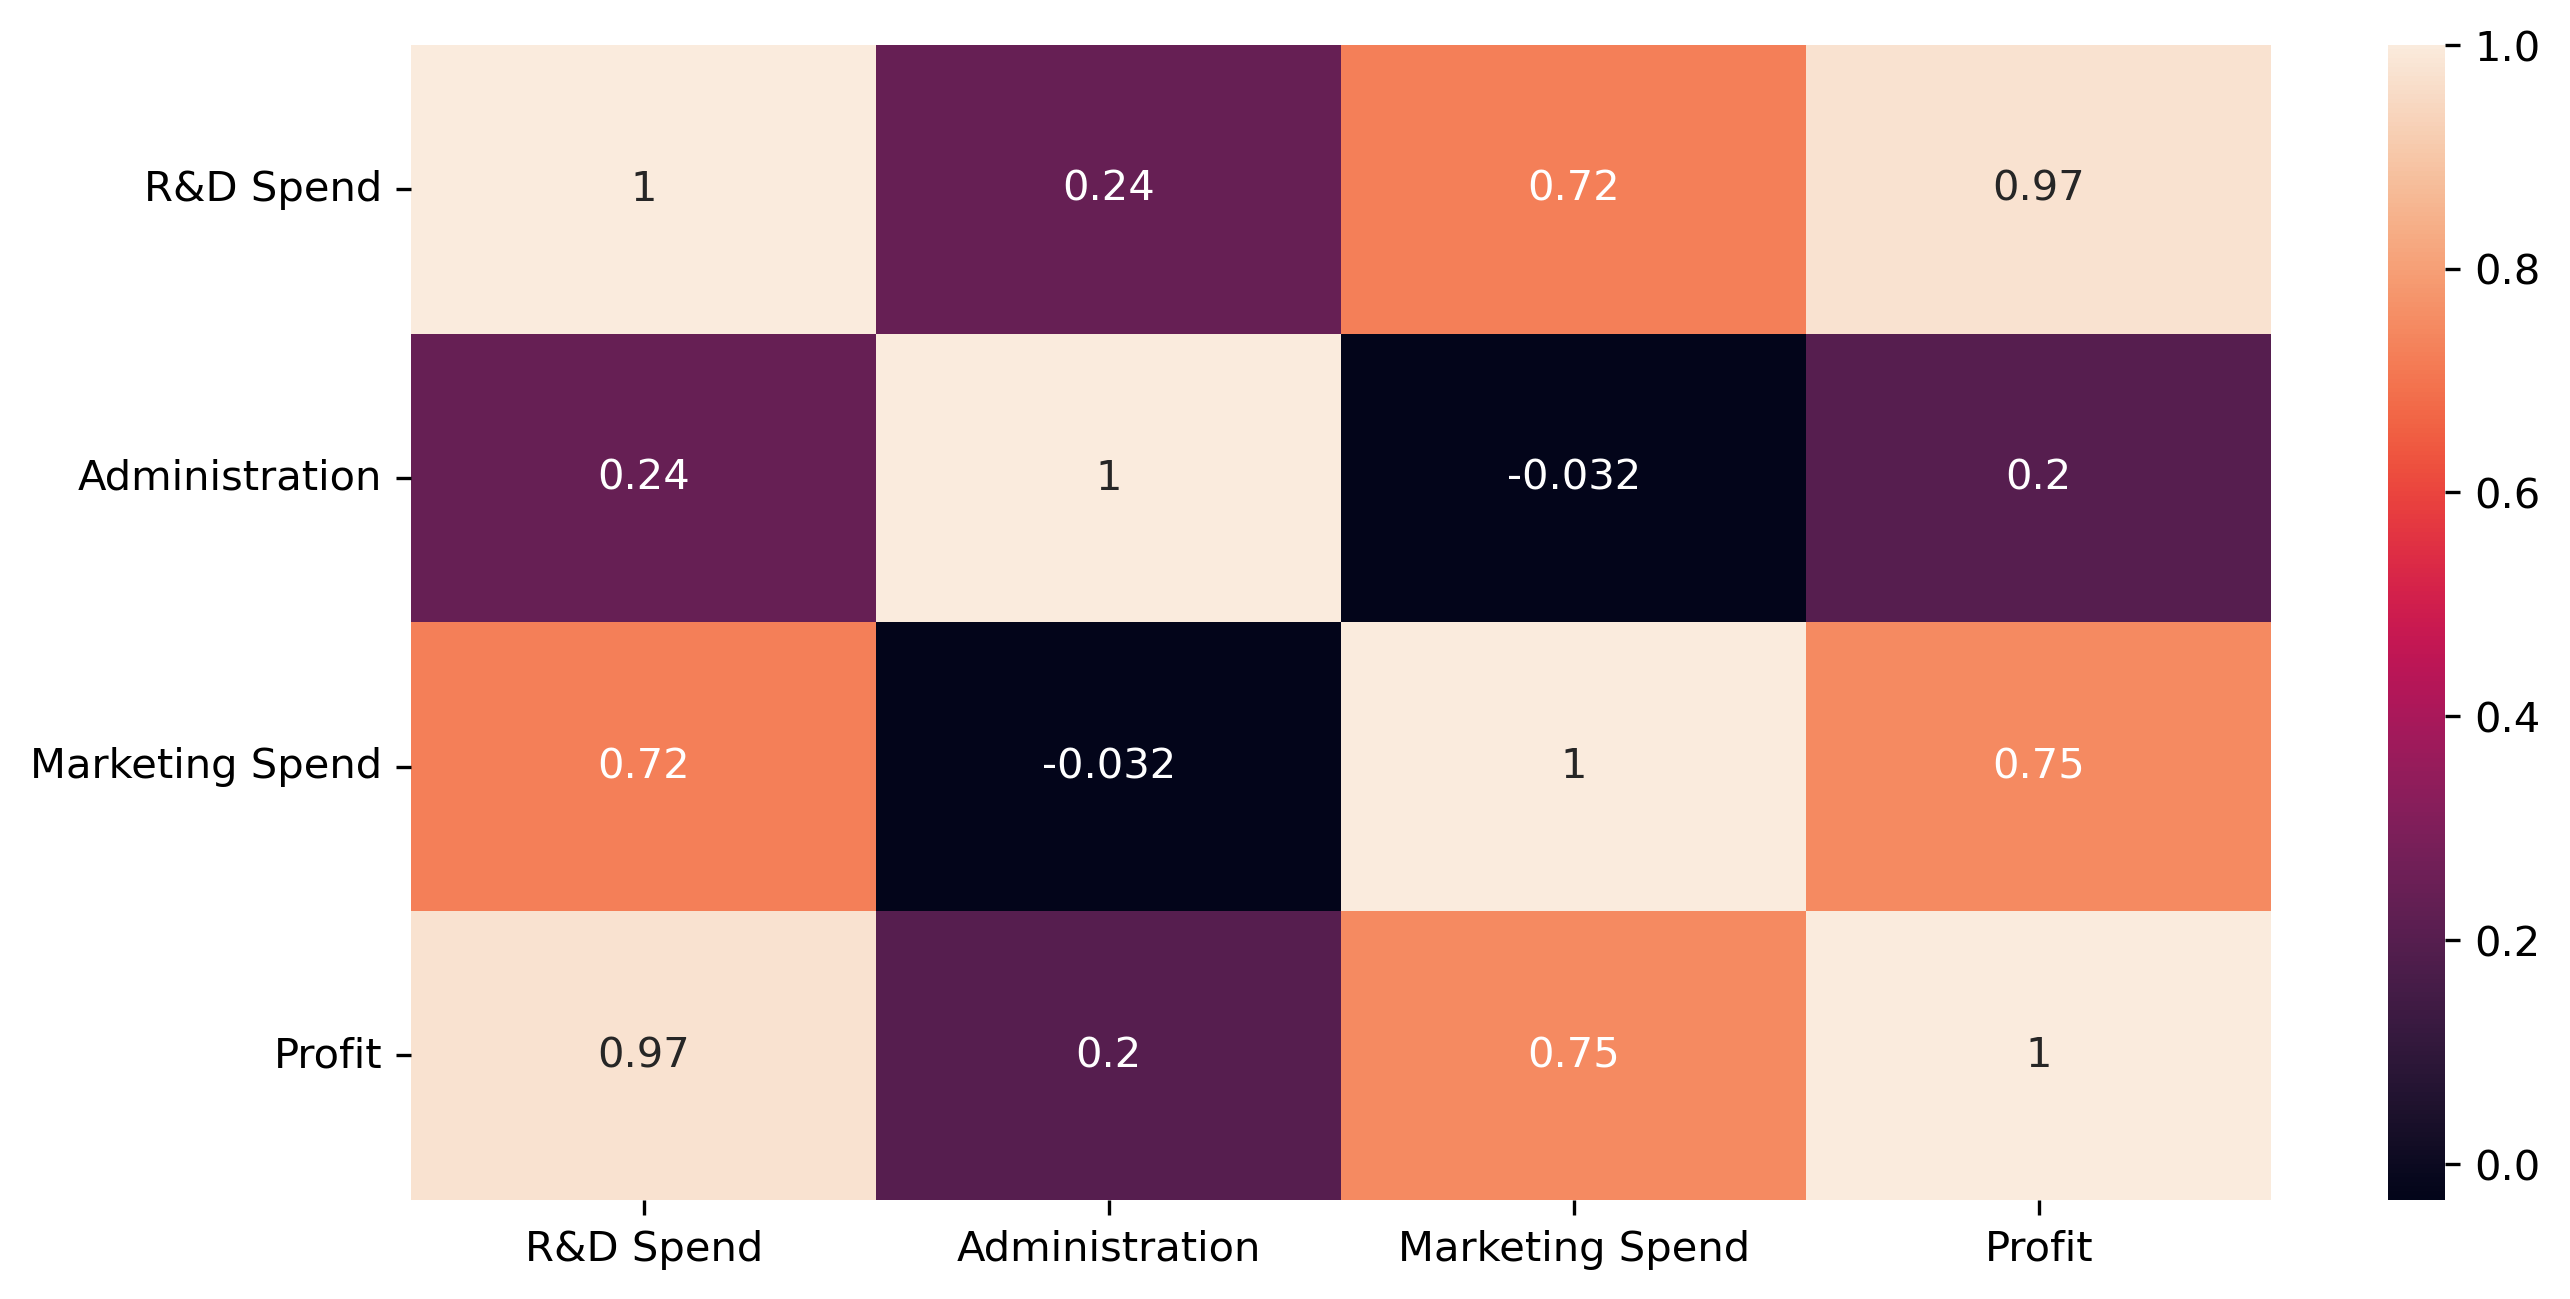

In [7]:
sns.heatmap(df.corr(),annot=True)

<Axes: >

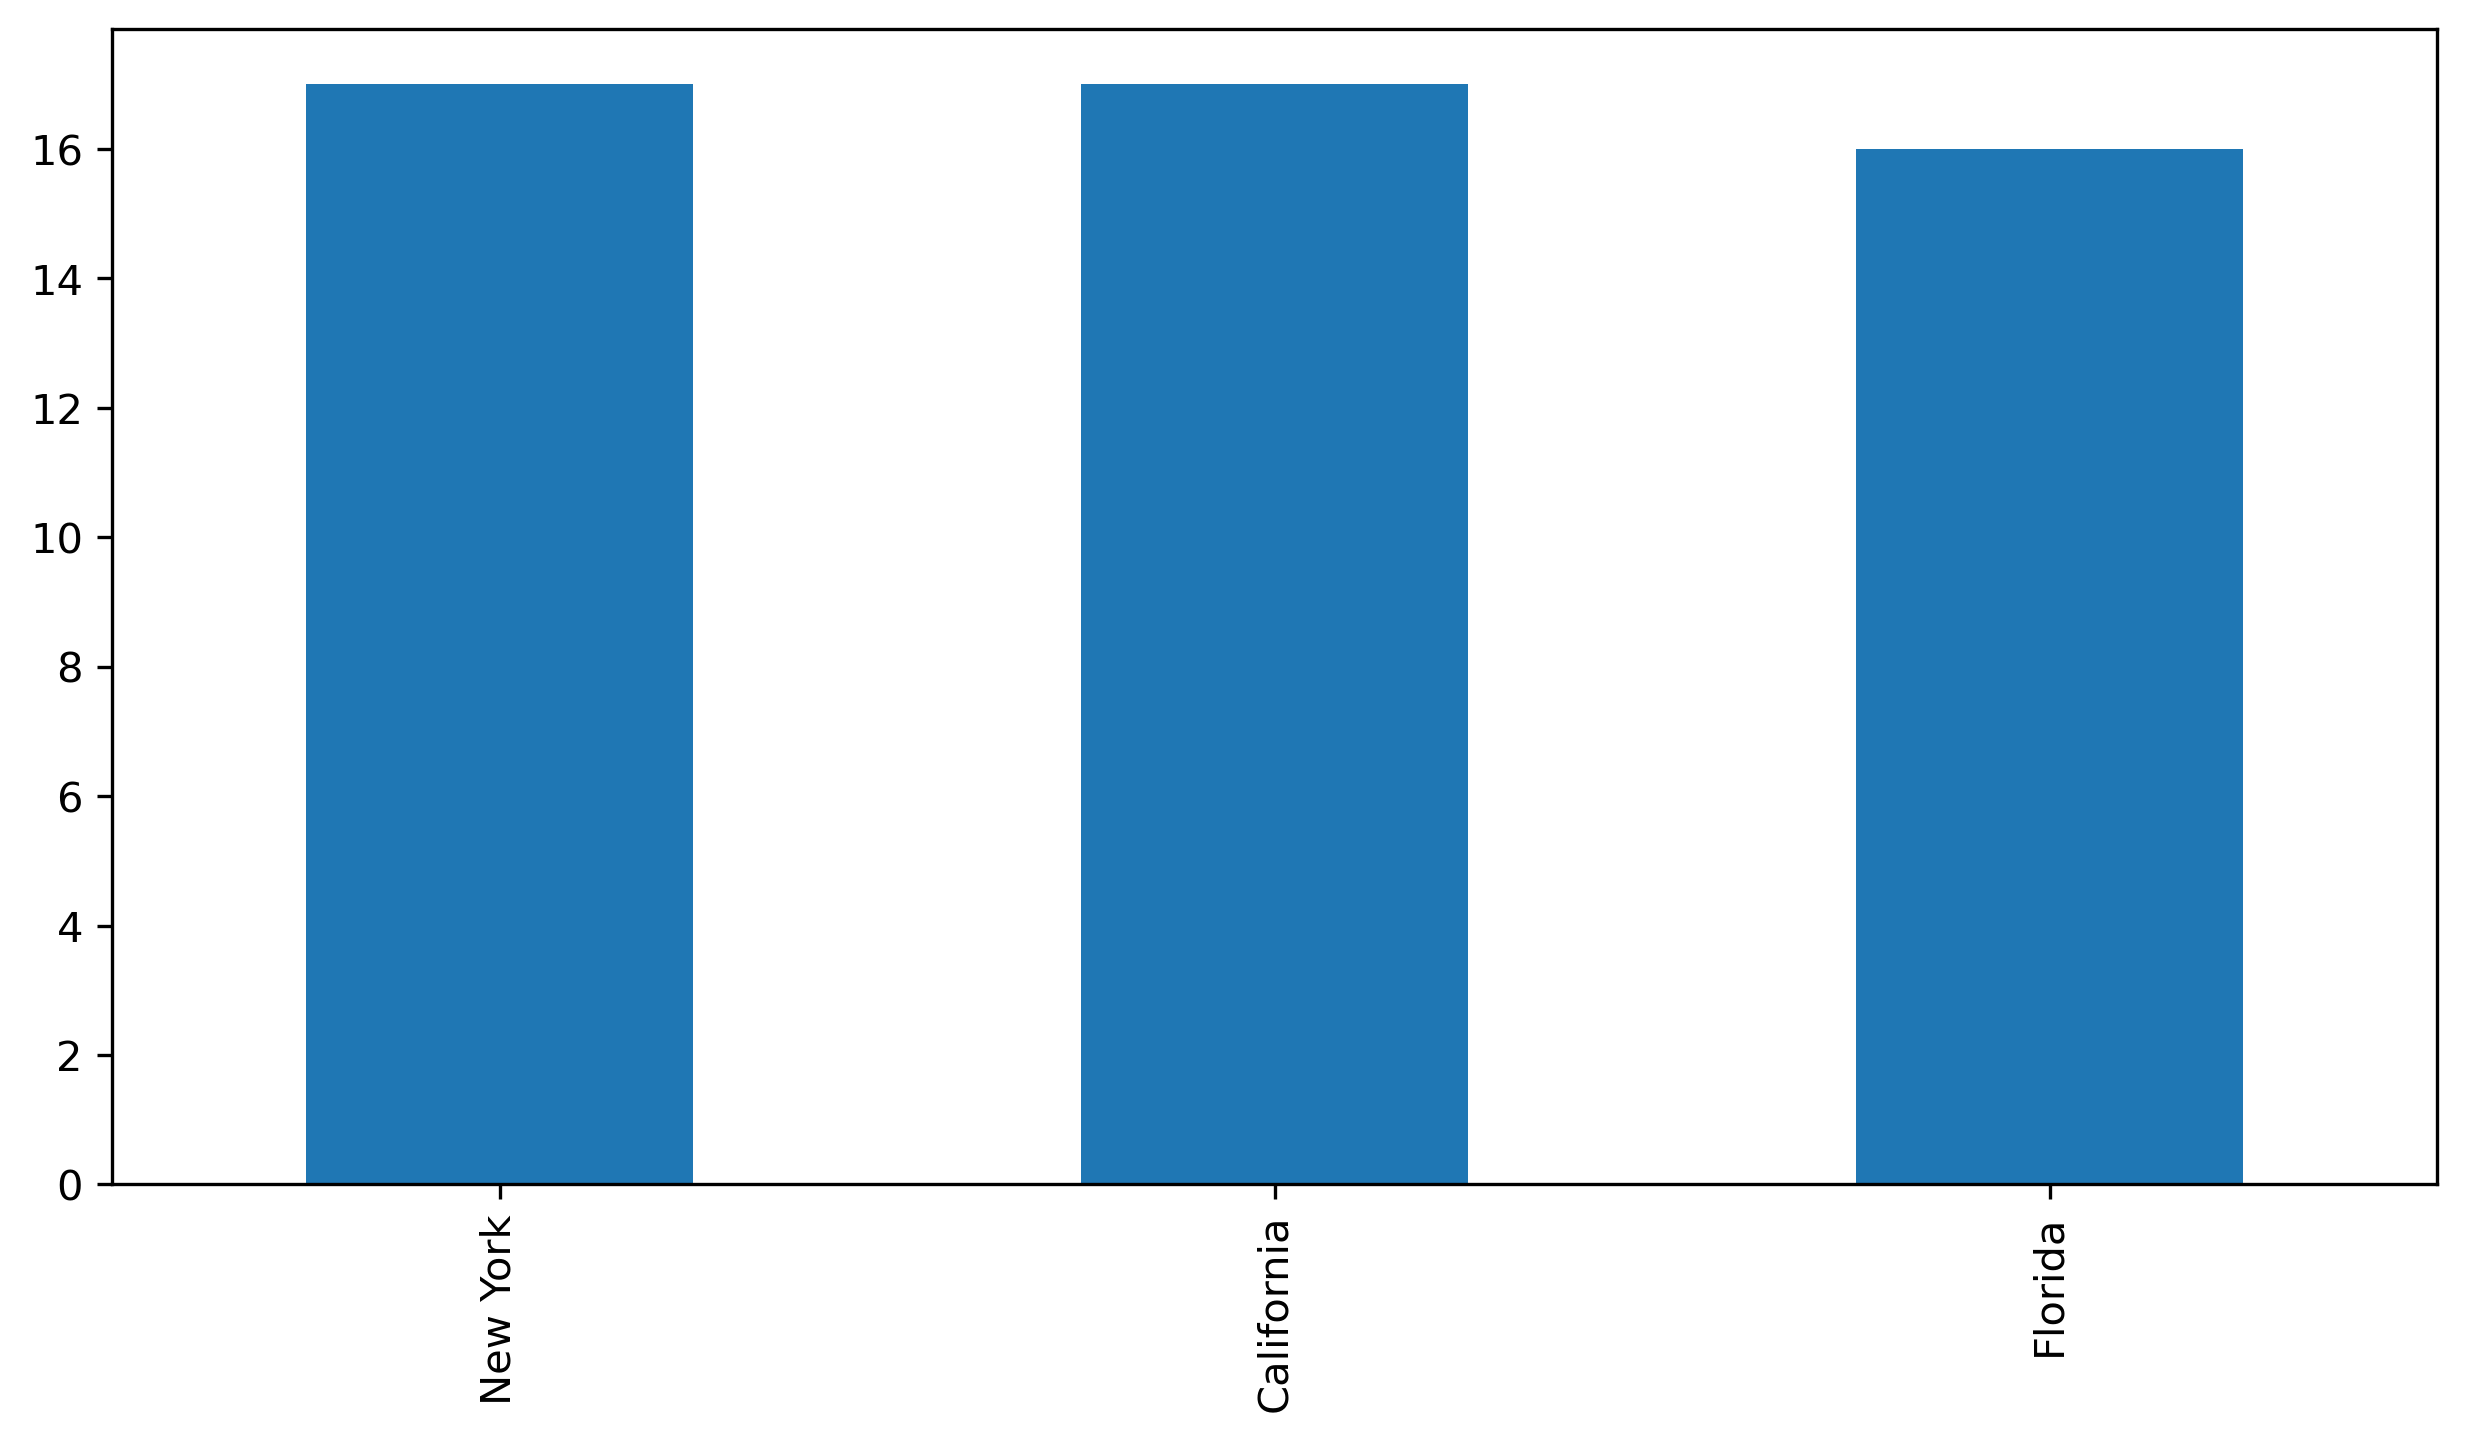

In [8]:
df['State'].value_counts().plot(kind = 'bar')

In [9]:
df.drop(columns=['State'],inplace=True)

In [10]:
df.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [11]:
df.rename(columns={'R&D Spend': 'RD_spend','Marketing Spend':'marketing_spend'}, inplace=True)

In [12]:
df.head()

,RD_spend,Administration,marketing_spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [13]:
# Model Buiilding

In [14]:
import statsmodels.formula.api as smf

In [15]:
model = smf.ols('Profit~RD_spend+Administration+marketing_spend',data=df).fit()
model

In [16]:
model.params

Intercept          50122.192990
RD_spend               0.805715
Administration        -0.026816
marketing_spend        0.027228
dtype: float64

In [38]:
# Simple Linear Regression

rd = smf.ols('Profit~RD_spend+Administration',data=df).fit
rd

<bound method RegressionModel.fit of <statsmodels.regression.linear_model.OLS object at 0x0000010BFCE559D0>>

In [36]:
mk = smf.ols('Profit~marketing_spend+Administration',data=df).fit()
mk.pvalues

Intercept          2.589341e-01
marketing_spend    9.727245e-11
Administration     1.729198e-02
dtype: float64

In [39]:
# Calculate VIF

In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [41]:
df.head()

,RD_spend,Administration,marketing_spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [42]:
data = df.drop(columns=['Profit'])
data

,RD_spend,Administration,marketing_spend
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42
5,131876.90,99814.71,362861.36
6,134615.46,147198.87,127716.82
7,130298.13,145530.06,323876.68
8,120542.52,148718.95,311613.29
9,123334.88,108679.17,304981.62


In [43]:
data.values

array([[165349.2 , 136897.8 , 471784.1 ],
       [162597.7 , 151377.59, 443898.53],
       [153441.51, 101145.55, 407934.54],
       [144372.41, 118671.85, 383199.62],
       [142107.34,  91391.77, 366168.42],
       [131876.9 ,  99814.71, 362861.36],
       [134615.46, 147198.87, 127716.82],
       [130298.13, 145530.06, 323876.68],
       [120542.52, 148718.95, 311613.29],
       [123334.88, 108679.17, 304981.62],
       [101913.08, 110594.11, 229160.95],
       [100671.96,  91790.61, 249744.55],
       [ 93863.75, 127320.38, 249839.44],
       [ 91992.39, 135495.07, 252664.93],
       [119943.24, 156547.42, 256512.92],
       [114523.61, 122616.84, 261776.23],
       [ 78013.11, 121597.55, 264346.06],
       [ 94657.16, 145077.58, 282574.31],
       [ 91749.16, 114175.79, 294919.57],
       [ 86419.7 , 153514.11,      0.  ],
       [ 76253.86, 113867.3 , 298664.47],
       [ 78389.47, 153773.43, 299737.29],
       [ 73994.56, 122782.75, 303319.26],
       [ 67532.53, 105751.03, 3047

In [44]:
vif =  pd.DataFrame()
vif

""


In [45]:
vif['Features'] = data.columns
vif

,Features
0,RD_spend
1,Administration
2,marketing_spend


In [46]:
range(len(data.columns))

range(0, 3)

In [47]:
vif['VIF'] = [variance_inflation_factor(data.values,i) for i in range(len(data.columns))]
vif

,Features,VIF
0,RD_spend,8.384571
1,Administration,4.026406
2,marketing_spend,7.593984


In [48]:
#Subset selection

In [49]:
mk = smf.ols('Profit~marketing_spend+Administration',data=df).fit()
mk.rsquared,mk.aic

(0.6097229746770663, 1160.2648038638672)

In [50]:
rd = smf.ols('Profit~RD_spend+Administration',data=df).fit()
rd.rsquared,rd.aic

(0.9478129385009173, 1059.6636934567293)

In [51]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Wed, 22 Nov 2023   Prob (F-statistic):           4.53e-30
Time:                        13:46:06   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RD_spend            0.8057      0.045     17.846      0.000       0.715       0.897
Administration     -0.0268      0.051     -0.526      0.602      -0.130       0.076
marketing_spend     0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [52]:
# Model Validation Techique

In [53]:
model = smf.ols('Profit~RD_spend+Administration',data=df).fit()
model.rsquared

0.9478129385009173

In [54]:
#Statsmodel
import statsmodels.api as sm

In [55]:
df.head()

,RD_spend,Administration,marketing_spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [56]:
model.resid

0      2079.649486
1      4749.359826
2      9239.337178
3      9838.385168
4     -6368.626886
5     -6299.223299
6     -7017.651084
7     -3753.952582
8      1284.700786
9     -5696.378405
10     9235.213563
11     7446.155824
12    12524.671567
13     7293.055893
14   -17392.896004
15   -17204.311290
16    11293.919422
17    -3433.440974
18    -3667.525602
19     1521.808934
20     3882.032537
21    -3005.282643
22    -1819.486192
23     1230.682686
24    -7494.149233
25     4164.790343
26    -6456.905185
27    -5267.331867
28     1130.936860
29    -2331.644260
30    -2267.126777
31    -2017.328718
32    -5276.649740
33     -488.456385
34    10158.487187
35     6430.501317
36    17843.425291
37     -213.204647
38    12397.085184
39    -2725.173594
40     4846.063661
41     3354.505431
42     1328.209595
43     8255.270786
44     -602.100738
45    15756.687083
46     -392.222274
47    -5149.882512
48   -16938.371096
49   -34005.613622
dtype: float64

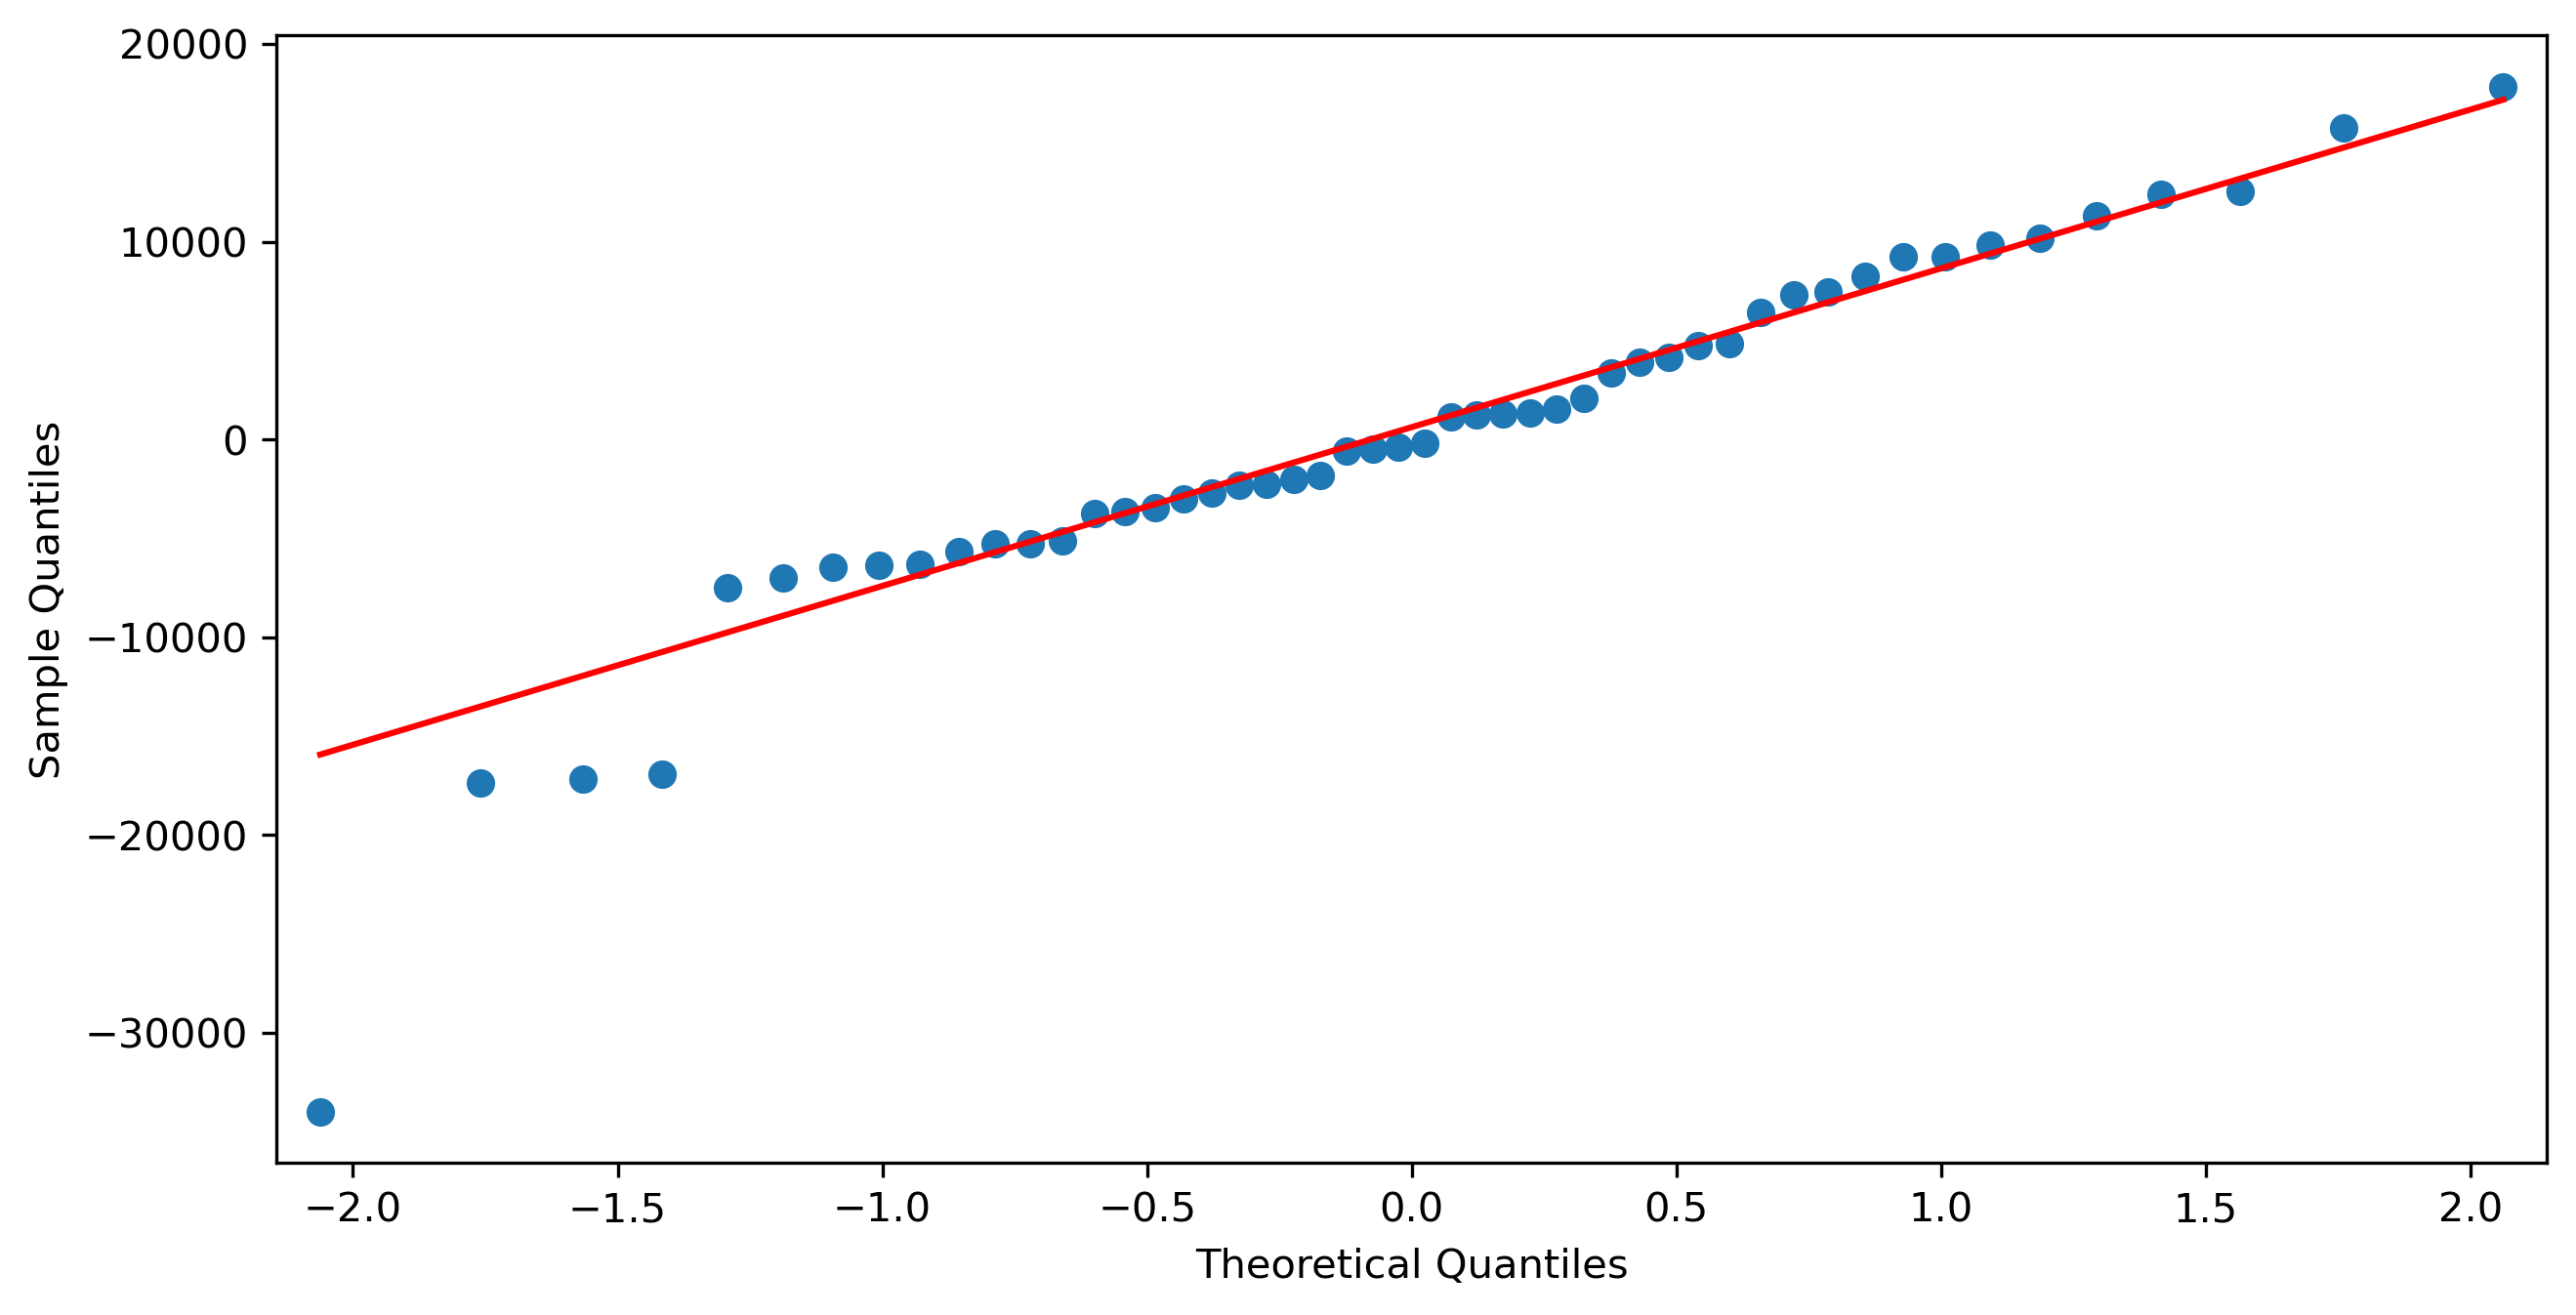

In [57]:
#Q-Q plot
sm.qqplot(model.resid, line = 'q');

In [59]:
#get index for higher residuals
np.argmin(model.resid), np.min(model.resid)

(49, -34005.6136221992)

In [60]:
#Residual plot of Homoscedasticity

In [61]:
model.fittedvalues, model.resid

(0     190182.180514
 1     187042.700174
 2     181811.052822
 3     173063.604832
 4     172556.566886
 5     163290.343299
 6     163140.161084
 7     159506.552582
 8     150927.069214
 9     155456.338405
 10    136886.736437
 11    136813.244176
 12    129060.848433
 13    127014.294107
 14    149995.546004
 15    147121.351290
 16    115699.010578
 17    128803.810974
 18    127934.425602
 19    121255.051066
 20    114591.997463
 21    114318.302643
 22    112171.736192
 23    107503.307314
 24    116046.189233
 25    103239.549657
 26    112190.445185
 27    110275.641867
 28    102151.443140
 29    103336.284260
 30    102204.716777
 31     99500.888718
 32    102704.489740
 33     97267.376385
 34     86554.312813
 35     90049.008683
 36     72864.764709
 37     90162.344647
 38     68831.974816
 39     83730.933594
 40     73393.846339
 41     74444.324569
 42     70170.280405
 43     61503.709214
 44     65802.430738
 45     49169.392917
 46     49882.972274
 47     47709

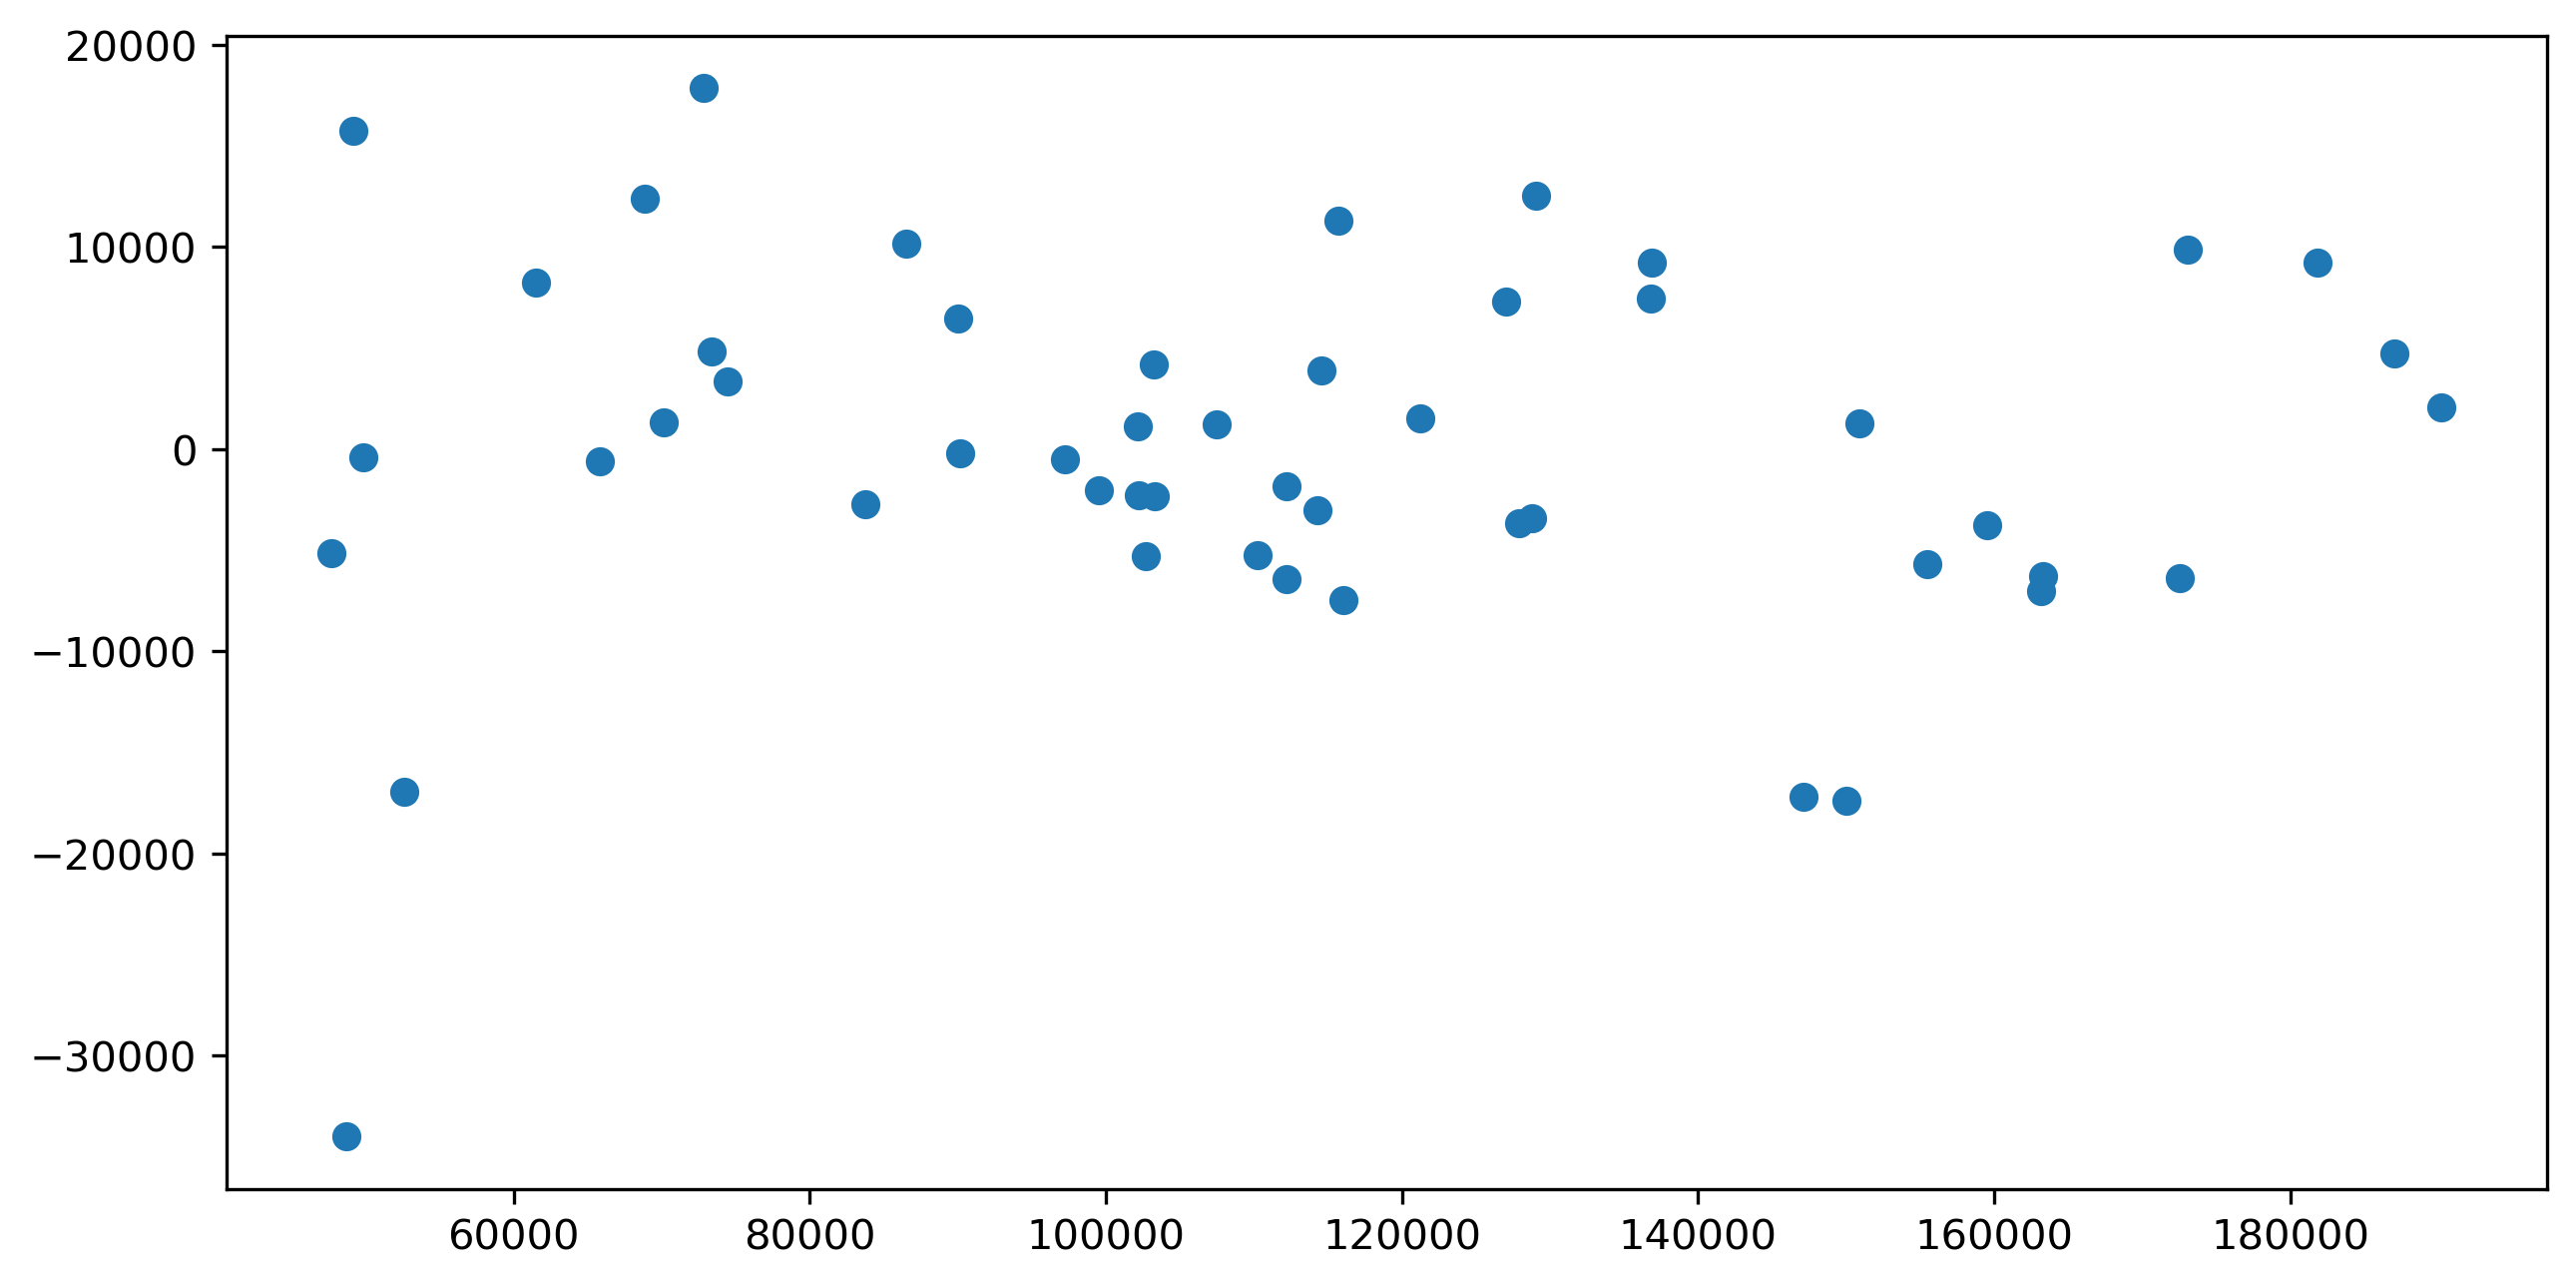

In [62]:
plt.scatter(model.fittedvalues, model.resid)

In [63]:
#Residual VS Regressor

eval_env: 1


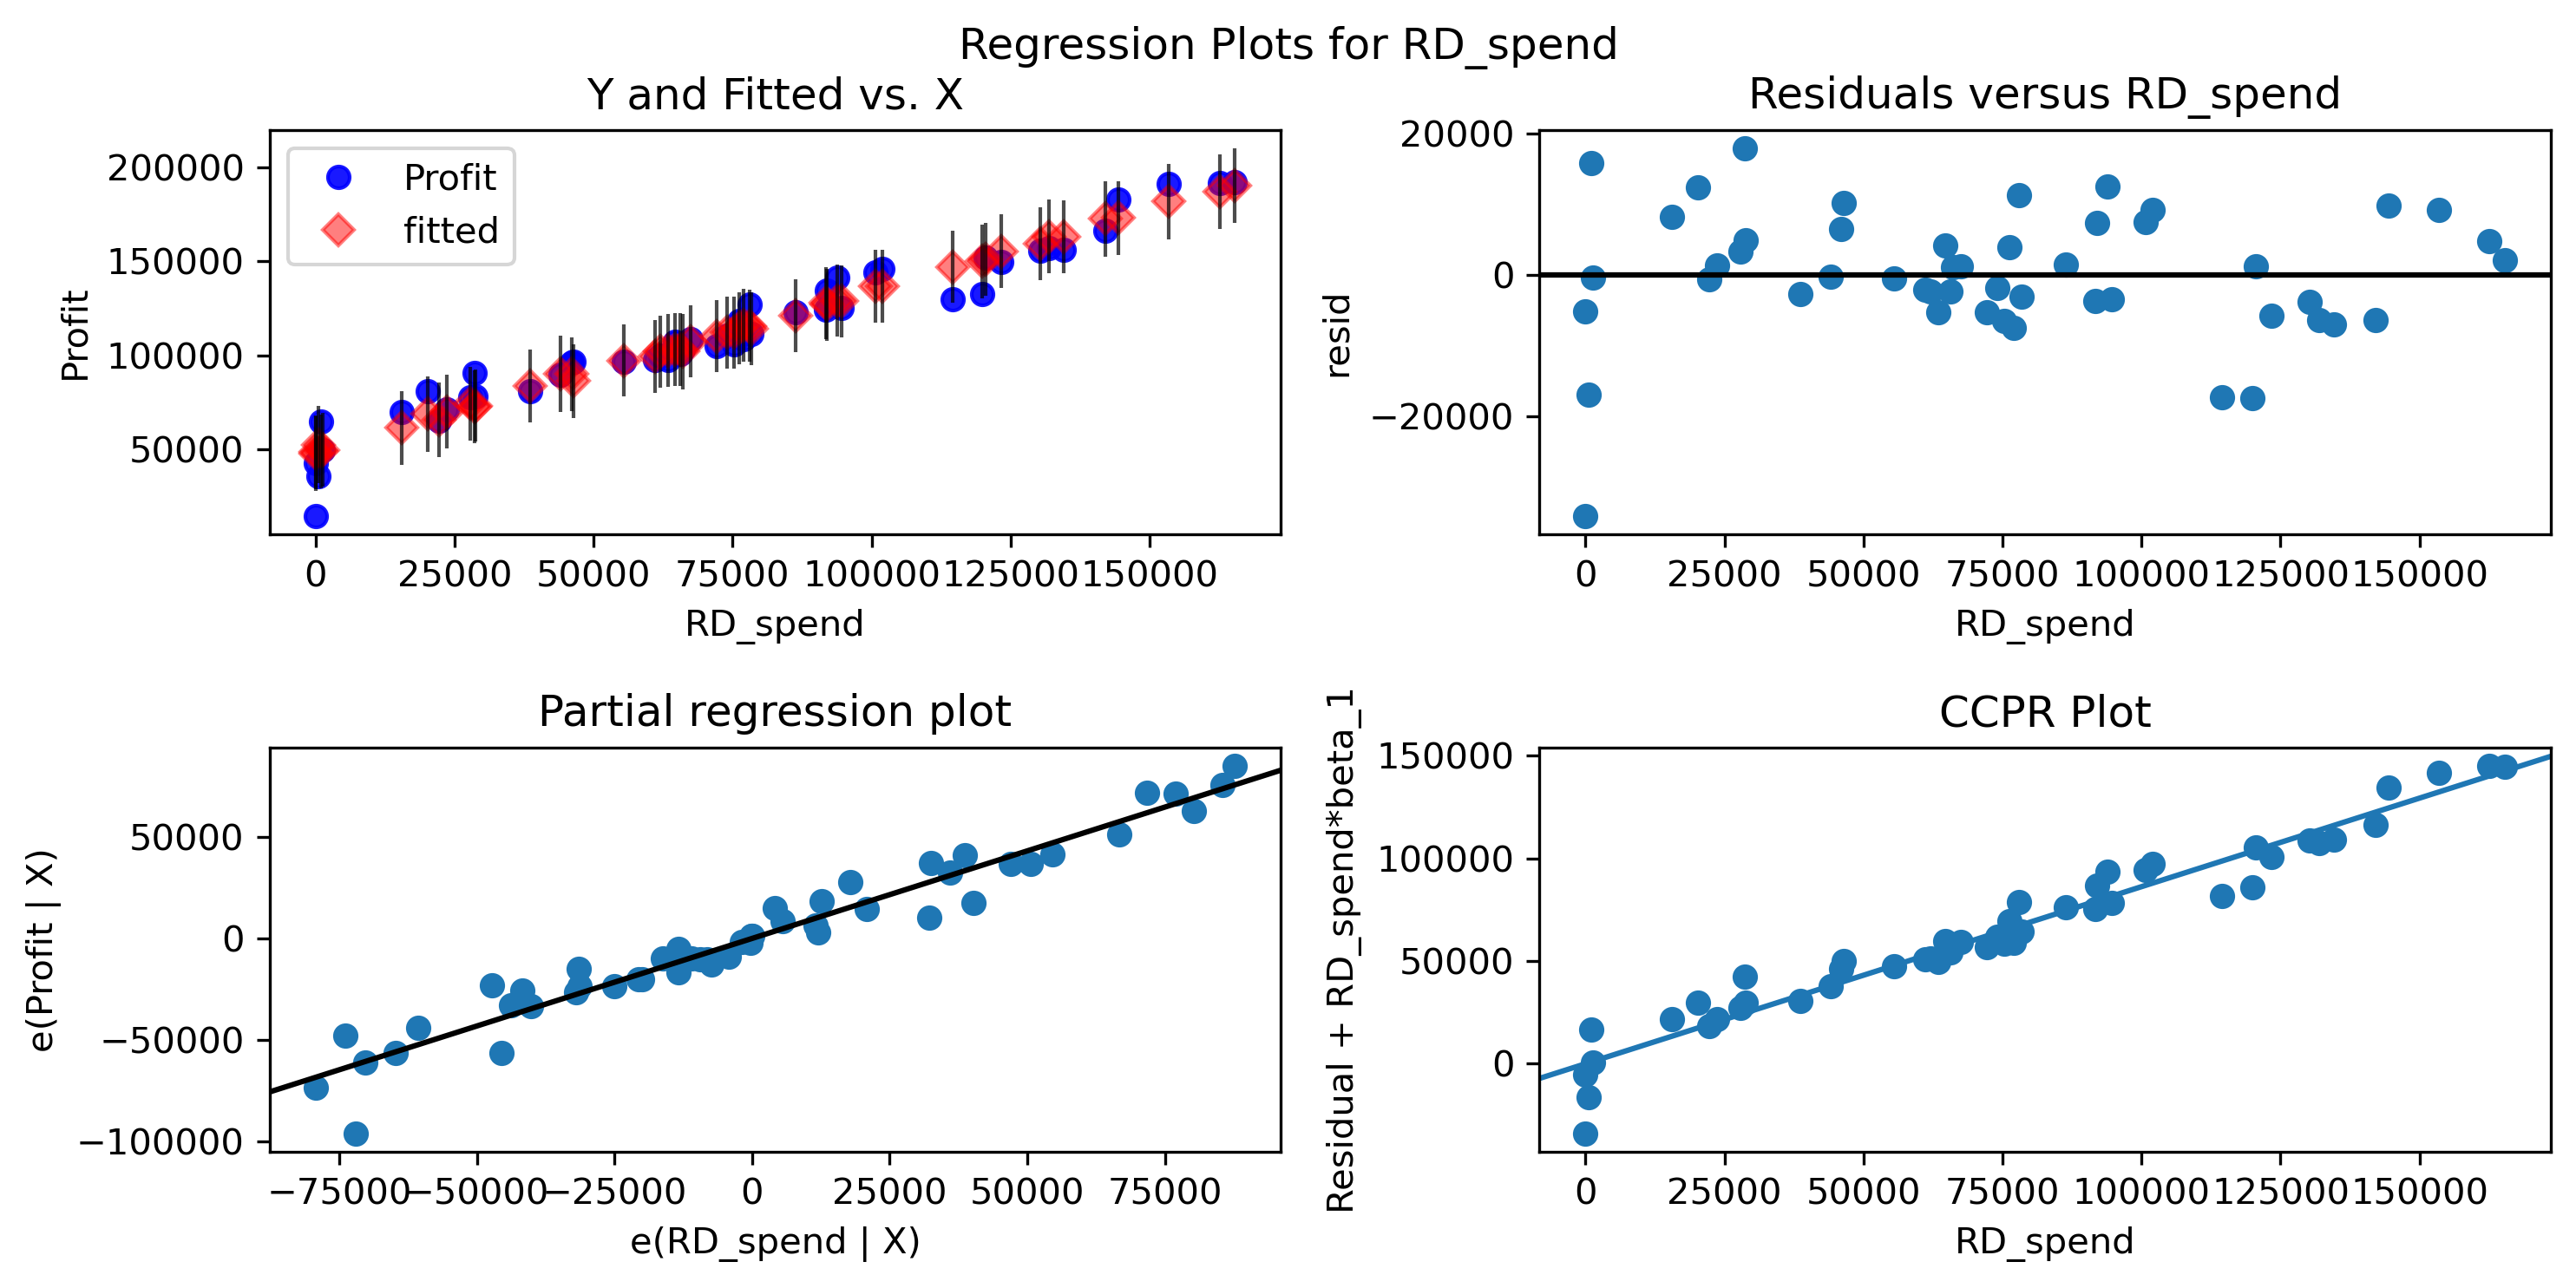

In [64]:
#rd
sm.graphics.plot_regress_exog(model,'RD_spend');

In [65]:
#MODEL DELETION TECHNIQUES
#Cook's Distance
#Detecting influencers and outliers

In [66]:
model

In [67]:
#Find the influence data
inf = model.get_influence()

#Calculate the cooks distance
c , p = inf.cooks_distance

In [68]:
c

array([2.04891117e-03, 1.10719705e-02, 4.45970340e-02, 3.10535270e-02,
       2.11438476e-02, 1.36907373e-02, 1.35107805e-02, 3.46841651e-03,
       3.66234828e-04, 7.51800918e-03, 1.16600707e-02, 1.36901599e-02,
       1.50207539e-02, 5.68804702e-03, 8.17568588e-02, 4.42094438e-02,
       1.01122046e-02, 1.72273244e-03, 1.37988343e-03, 4.50957682e-04,
       1.29256181e-03, 1.80511998e-03, 2.60725721e-04, 1.58579967e-04,
       7.75429813e-03, 2.18516446e-03, 5.74156819e-03, 2.32513846e-03,
       8.13668428e-04, 1.14848791e-03, 4.40912370e-04, 8.88021449e-04,
       2.58413417e-03, 2.86214125e-05, 3.26636622e-02, 9.81464013e-03,
       5.76430905e-02, 3.48387257e-05, 8.04974487e-02, 1.98645424e-03,
       3.84314890e-03, 3.15370564e-03, 3.93186682e-04, 1.70395623e-02,
       1.53194084e-04, 8.37159585e-02, 4.81274516e-05, 1.08495170e-02,
       2.61113283e-01, 3.75268147e-01])

<StemContainer object of 3 artists>

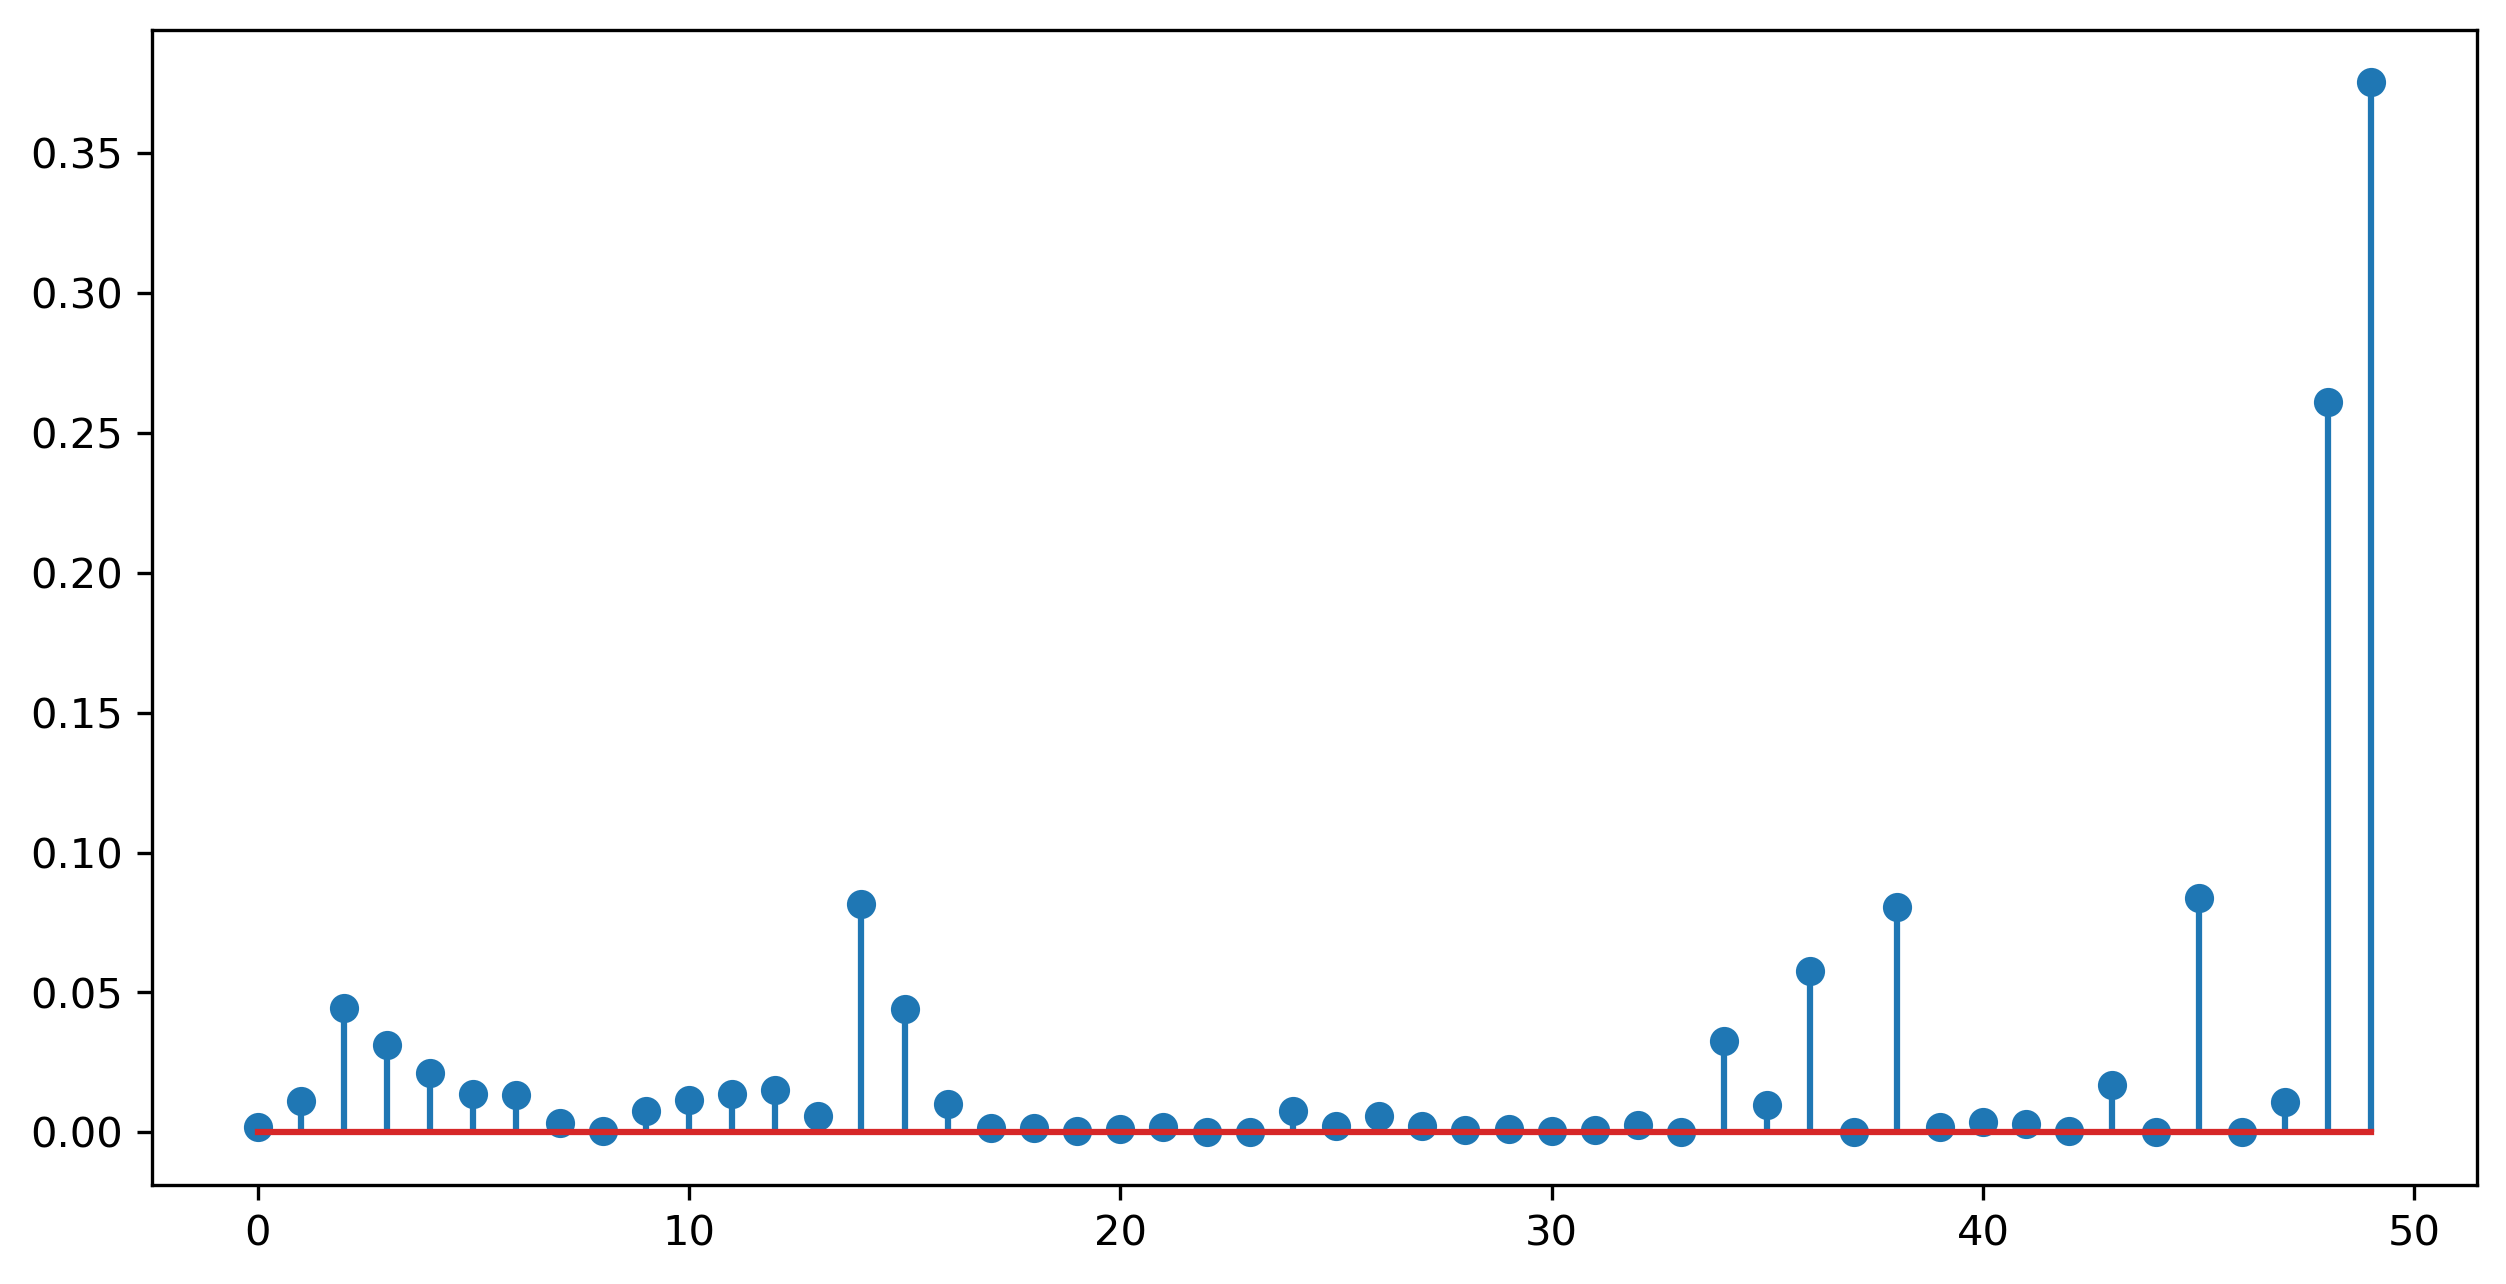

In [69]:
# Cook's distance plot
plt.stem(c)

In [70]:
np.argmax(c), np.max(c) #Since the  C value is <1 , we can stop the diagnostic process and finalize the model

(49, 0.3752681465677589)

In [71]:
df.iloc[[49]]

,RD_spend,Administration,marketing_spend,Profit
49,0.0,116983.8,45173.06,14681.4


In [72]:
final_model = smf.ols('Profit~RD_spend+Administration',data=df).fit()
final_model.rsquared

0.9478129385009173

In [73]:
#Predicting for new records
df.head(2)

,RD_spend,Administration,marketing_spend,Profit
0,165349.2,136897.80,471784.10,192261.83
1,162597.7,151377.59,443898.53,191792.06


In [74]:
test = pd.DataFrame({
    'RD_spend' : [165349.2,162597.7],
    'Administration' : [136897.80,151377.59]
})

In [75]:
test

,RD_spend,Administration
0,165349.2,136897.80
1,162597.7,151377.59


In [76]:
final_model.predict(test)

0    190182.180514
1    187042.700174
dtype: float64